In [1]:
import sklearn as sk
import statsmodels.formula.api as smf
import pandas as pd
import seaborn as sns
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=pd.read_csv("https://github.com/Dinesh-Adhithya-H/Foundations-of-Sports-Analytics-Data-Representation-and-Models-in-Sports/blob/main/DATA/NBA_Games.csv?raw=true")

In [3]:
data

,CITY,TEAM_NAME,TEAM_ID,GAME_ID,NICKNAME,STATE,YEAR_FOUNDED,SEASON_ID,TEAM_ABBREVIATION,GAME_DATE,MATCHUP,WL,MIN,PTS,PTSAGN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,home,not paired
0,Oklahoma City,Oklahoma City Thunder,1.610613e+09,1.130000e+07,Thunder,Oklahoma,1967.0,12013.0,OKC,10/5/2013,OKC @ FBU,W,241.0,95.0,NaN,36.0,74.0,0.486,2.0,14.0,0.143,21.0,28.0,0.750,18.0,34.0,52.0,22.0,9.0,8.0,20.0,26.0,13.0,A,999.0
1,Chicago,Chicago Bulls,1.610613e+09,1.130000e+07,Bulls,Illinois,1966.0,12013.0,CHI,10/5/2013,CHI @ IND,W,239.0,82.0,76.0,28.0,74.0,0.378,3.0,10.0,0.300,23.0,30.0,0.767,17.0,39.0,56.0,20.0,5.0,10.0,23.0,25.0,6.0,A,0.0
2,Indiana,Indiana Pacers,1.610613e+09,1.130000e+07,Pacers,Indiana,1976.0,12013.0,IND,10/5/2013,IND vs. CHI,L,240.0,76.0,82.0,27.0,82.0,0.329,5.0,17.0,0.294,17.0,23.0,0.739,11.0,27.0,38.0,15.0,12.0,8.0,15.0,23.0,-6.0,H,0.0
3,New Orleans,New Orleans Pelicans,1.610613e+09,1.130000e+07,Pelicans,Louisiana,2002.0,12013.0,NOP,10/5/2013,NOP @ HOU,W,239.0,116.0,115.0,42.0,86.0,0.488,4.0,10.0,0.400,28.0,40.0,0.700,12.0,21.0,33.0,17.0,12.0,4.0,15.0,32.0,1.0,A,0.0
4,Houston,Houston Rockets,1.610613e+09,1.130000e+07,Rockets,Texas,1967.0,12013.0,HOU,10/5/2013,HOU vs. NOP,L,240.0,115.0,116.0,39.0,68.0,0.574,8.0,22.0,0.364,29.0,38.0,0.763,5.0,30.0,35.0,24.0,9.0,4.0,22.0,27.0,-1.0,H,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18411,Memphis,Memphis Grizzlies,1.610613e+09,1.621900e+09,Grizzlies,Tennessee,1995.0,22019.0,MEM,7/3/2019,MEM vs. CLE,W,199.0,81.0,68.0,31.0,74.0,0.419,10.0,28.0,0.357,9.0,13.0,0.692,11.0,36.0,47.0,19.0,8.0,5.0,14.0,19.0,13.0,H,0.0
18412,San Antonio,San Antonio Spurs,1.610613e+09,1.621900e+09,Spurs,Texas,1976.0,22019.0,SAS,7/3/2019,SAS @ UTA,L,200.0,81.0,84.0,29.0,70.0,0.414,7.0,17.0,0.412,16.0,26.0,0.615,9.0,29.0,38.0,12.0,5.0,3.0,11.0,14.0,-7.2,A,0.0
18413,Utah,Utah Jazz,1.610613e+09,1.621900e+09,Jazz,Utah,1974.0,22019.0,UTA,7/3/2019,UTA vs. SAS,W,199.0,84.0,81.0,30.0,74.0,0.405,11.0,31.0,0.355,13.0,19.0,0.684,13.0,31.0,44.0,15.0,6.0,5.0,15.0,25.0,5.8,H,0.0
18414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data=data[data.SEASON_ID==22018]
data.describe()

,TEAM_ID,GAME_ID,YEAR_FOUNDED,SEASON_ID,MIN,PTS,PTSAGN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,not paired
count,2.560000e+03,2.560000e+03,2560.000000,2560.0,2560.000000,2560.000000,2472.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000
mean,1.610613e+09,1.279724e+08,1969.629688,22018.0,238.953125,109.191406,109.080097,40.359375,88.205469,0.458005,11.155859,31.753906,0.350810,17.316797,22.716406,0.763069,10.344141,34.404688,44.748828,24.032031,7.694141,4.974219,13.612500,20.852344,-0.041875,34.340625
std,8.753502e+00,3.841538e+08,16.740380,0.0,12.705895,14.344124,14.392685,5.786935,8.219058,0.054905,3.788406,7.391813,0.087162,5.977294,7.357401,0.104302,3.735794,5.606434,6.812153,5.450526,2.949988,2.499105,3.879163,4.341435,14.554212,182.043817
min,1.610613e+09,2.180000e+07,1946.000000,22018.0,197.000000,53.000000,53.000000,17.000000,55.000000,0.262000,2.000000,13.000000,0.080000,2.000000,4.000000,0.263000,1.000000,17.000000,22.000000,7.000000,0.000000,0.000000,3.000000,9.000000,-56.000000,0.000000
25%,1.610613e+09,2.180033e+07,1949.000000,22018.0,239.000000,100.000000,100.000000,37.000000,83.000000,0.420750,9.000000,27.000000,0.292000,13.000000,18.000000,0.700000,8.000000,30.000000,40.000000,20.000000,6.000000,3.000000,11.000000,18.000000,-9.000000,0.000000
50%,1.610613e+09,2.180066e+07,1970.000000,22018.0,240.000000,110.000000,110.000000,40.000000,88.000000,0.458000,11.000000,31.000000,0.348000,17.000000,22.000000,0.768000,10.000000,34.000000,44.000000,24.000000,7.000000,5.000000,13.000000,21.000000,-1.000000,0.000000
75%,1.610613e+09,2.180099e+07,1980.000000,22018.0,241.000000,118.000000,118.000000,44.000000,93.000000,0.494000,13.000000,36.000000,0.406000,21.000000,27.250000,0.833000,13.000000,38.000000,49.000000,28.000000,10.000000,6.000000,16.000000,24.000000,9.000000,0.000000
max,1.610613e+09,1.621800e+09,2002.000000,22018.0,341.000000,168.000000,168.000000,61.000000,123.000000,0.649000,27.000000,70.000000,0.842000,44.000000,54.000000,1.000000,26.000000,55.000000,71.000000,42.000000,20.000000,19.000000,27.000000,38.000000,56.000000,999.000000


In [5]:
print(data.columns.tolist())

['CITY', 'TEAM_NAME', 'TEAM_ID', 'GAME_ID', 'NICKNAME', 'STATE', 'YEAR_FOUNDED', 'SEASON_ID', 'TEAM_ABBREVIATION', 'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'PTSAGN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS', 'home', 'not paired']


In [6]:
data.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
data["result"]=np.where(data.WL=="W",1,0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
data=data.groupby("TEAM_NAME")["result","PTS","PTSAGN"].sum().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [10]:
data["wpc"]=data["result"]/82
data["pyth"]=data["PTS"]**2/(data["PTS"]**2+data["PTSAGN"]**2)

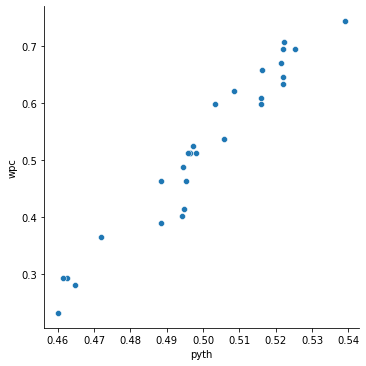

In [11]:
sns.relplot(x="pyth",y="wpc",data=data)

In [12]:
pyth_lm = smf.ols(formula = 'wpc ~ pyth', data=data).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wpc   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     447.0
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           2.48e-18
Time:                        04:33:32   Log-Likelihood:                 57.497
No. Observations:                  29   AIC:                            -111.0
Df Residuals:                      27   BIC:                            -108.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.7572      0.155    -17.774      0.000      -3.076      -2.439
pyth           6.5536      0.310     21.143      0.000       5.918       7.190
==============================================================================
Omnibus:                        2.188   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.335   Jarque-Bera (JB):                1.779
Skew:                          -0.594   Prob(JB):                        0.411
Kurtosis:                       2.749   Cond. No.                         60.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
pyth_lm = smf.ols(formula = 'wpc ~ result', data=data).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wpc   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.428e+31
Date:                Sun, 27 Jun 2021   Prob (F-statistic):               0.00
Time:                        04:34:26   Log-Likelihood:                 1027.7
No. Observations:                  29   AIC:                            -2051.
Df Residuals:                      27   BIC:                            -2049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -2.66e-16   7.31e-17     -3.641      0.001   -4.16e-16   -1.16e-16
result         0.0122   1.66e-18   7.37e+15      0.000       0.012       0.012
==============================================================================
Omnibus:                        6.886   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                2.078
Skew:                           0.151   Prob(JB):                        0.354
Kurtosis:                       1.724   Cond. No.                         170.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""